In [11]:
import pandas as pd

In [12]:
timesData = pd.read_csv('timesData.csv')

In [13]:
timesData.dropna(inplace=True)

In [14]:
timesData

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,601-800,Xidian University,China,17.9,12.8,12.1,8.9,83.7,-,"31,618",16.4,2%,29 : 71,2016
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [18]:
timesData['num_students'] = pd.to_numeric(timesData.income, errors='coerce')
timesData['income'] = pd.to_numeric(timesData.income, errors='coerce')
timesData['research'] = pd.to_numeric(timesData.income, errors='coerce')
timesData['international'] = pd.to_numeric(timesData.income, errors='coerce')
timesData['citations'] = pd.to_numeric(timesData.income, errors='coerce')
timesData['teaching'] = pd.to_numeric(timesData.income, errors='coerce')


In [19]:
df = timesData[timesData.year == 2016]

## Réaliser une analyse en composante principale

Un moyen plus courant d'accélérer un algorithme d'apprentissage automatique consiste à utiliser l'analyse en composants principaux (PCA). Si votre algorithme d'apprentissage est trop lent parce que la dimension d'entrée est trop élevée, utiliser l'ACP pour l'accélérer peut être un choix raisonnable. C'est probablement l'application la plus courante de l'ACP.Une autre application courante de PCA est la visualisation des données.

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

### Explication sur les effets de la non standardisation des données StandartSc
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-pyaler()


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['num_students', 'income'
            #, 'teaching', 'international',
           # 'research','citations'
           ]



# Séparer les fonctionnalités 
x = df.loc [:, features] .values
# Separating out the target
y = df.loc[:,['university_name']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[ 2.55898475  2.55898475]
 [ 1.33075667  1.33075667]
 [ 0.8434435   0.8434435 ]
 ...
 [-0.11626508 -0.11626508]
 [-0.29527808 -0.29527808]
 [-0.32511358 -0.32511358]]


In [27]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
finalDf = pd.concat ([principalDf, timesData [['university_name']]], axis = 1)
a =list(finalDf)
a

NameError: name 'principalDf' is not defined

KeyError: 'target'

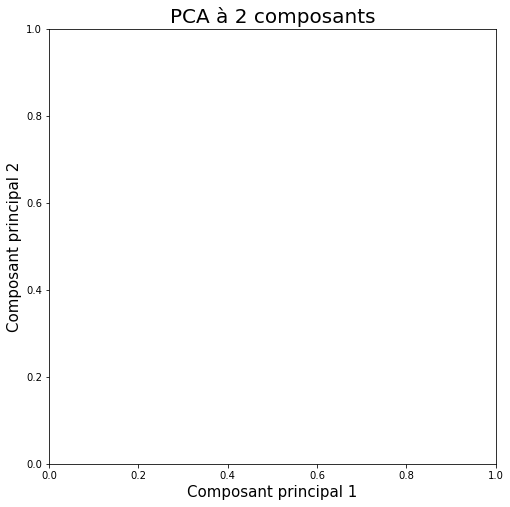

In [11]:
import matplotlib.pyplot as plt


fig = plt.figure (figsize = (8,8)) 
ax = fig.add_subplot (1,1,1) 
ax.set_xlabel ('Composant principal 1', fontsize = 15) 
ax.set_ylabel ('Composant principal 2', fontsize = 15) 
ax.set_title ('PCA à 2 composants', fontsize = 20)

targets = ['Stanford University', 'Massachusetts Institute of Technology',
           'Yokohama National University']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()